# 3.6 全连接神经网络分类过程可视化

## 3.6.1 导入所需的模块
主要包含绘图模块matplotlib与sklearn的多层感知机部分  
注意绘图模块中的`from mpl_toolkits.mplot3d import Axes3D`，虽然没有显示引用但是必须包含

In [1]:
%matplotlib inline
# %load 汇报
#加载所需的模块
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

## 3.6.2 准备训练数据与特征空间离散点
注意构建特征空间时，特征点采样的数量要适中，一味求多会导致程序卡死

In [2]:
#生成样本
X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.1)

#划分训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#构建特征空间
c,r = np.mgrid[[slice(X.min()- .2,X.max() + .2,50j)]*2]
p = np.c_[c.flat,r.flat]

#归一化
ss = StandardScaler().fit(X)
X = ss.transform(X)
p = ss.transform(p)
X_test = ss.transform(X_test)

## 3.6.3 实验数据可视化展示
对训练数据和测试数据进行可视化  
注意这里子图的绘制方法  
注意要使用`plt.axis('equal')`,否则特征空间显示时长宽不等

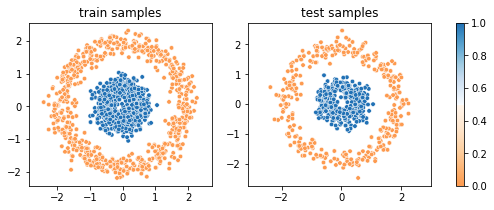

In [3]:
#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')

plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5);
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax);
plt.show();

## 3.6.4 进行训练并获得网络权重
`MLPClassifier((3,2),max_iter = 1000)`对网络进行构造，第一个参数指定了网络隐层的结构，默认为relu激活函数  
注意当某一隐层中有超过3节点时，可以进行编码，但是无法进行可视化

In [4]:
#分类
MLP = MLPClassifier((3,2),max_iter = 1000)
score = 0
while score < .98:    
    MLP.fit(X,y)
    score = MLP.score(X,y)
W,B = MLP.coefs_ , MLP.intercepts_
z = MLP.predict(p)
prob = MLP.predict_proba(p)[:,1];

## 3.6.5 展示分类结果
注意底色颜色渐变的含义

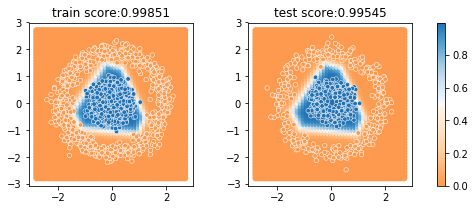

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9, 3),subplot_kw = {'aspect':'equal'})
ax1.scatter(*p.T,c = prob,cmap = cm_bright)
ax1.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
ax1.set_title('train score:%.5f'%MLP.score(X,y))
mp = ax2.scatter(*p.T,c = prob,cmap = cm_bright)
ax2.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
ax2.set_title('test score:%.5f'%MLP.score(X_test,y_test));
plt.colorbar(mp,ax = [ax1,ax2]);

## 3.6.6 定义相关工具函数
注意绘图函数的使用方法，结合本示例的调用方法进行调用即可


In [6]:
#激活函数
actf = lambda x: np.where(x<0,0,x)

#绘图函数
def scatter(p,c,X,wb = None,cmap = 'prism'):
    global y
    cols = p.shape[-1]
    assert cols in (1,2,3)
    fig = plt.figure(figsize = (6,4))
    if cols == 3:        
        ax3d = Axes3D(fig)
        if wb is not None:
            a1,a2 = p.min(0)[:2]
            b1,b2 = p.max(0)[:2]
            a,b = np.mgrid[a1 - 1:b1:10j,a2 - 1:b2:10j]
            (u1,u2,u3),b_ = wb
            z_ = (a * u1 + b * u2 + b_)/(-u3)
            ax3d.plot_wireframe(a, b, z_)

        mp = ax3d.scatter(*p.T,c = c,cmap=cmap)
        ax3d.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 40,linewidths = 0.5)
        mp = ax3d.scatter(*p.T,c = c,cmap=cmap)
        fig.colorbar(mp,shrink = 0.8)  

        ax3d.set_xlabel('X')
        ax3d.set_ylabel('Y')
        ax3d.set_zlabel('Z')
        return ax3d
        
    elif cols == 2 :
        ax = plt.gca()
        ax.axis('equal')
        if wb is not None:
            a1,a2 = p.min(0) - 0.2
            b1,b2 = p.max(0) + 0.2
            (u1,u2),b_ = wb
            y1,y2 = (a1 * u1 +  b_)/(-u2),(b1 * u1 +  b_)/(-u2)           
            ax.plot([a1,b1],[y1,y2],'r--')            
            ax.set_ylim(a2,b2)
            

        st = ax.scatter(*p.T,c = c,cmap=cmap)
        ax.scatter(*X.T,c = y,alpha = 0.7,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
        
        fig.colorbar(st)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        

    else:
        ax = plt.gca()
        t,tt = np.zeros_like(p.flat),np.zeros_like(X.flat)
        st = plt.scatter(p.flat,t,c = c,cmap=cmap)
        ax.scatter(X.flat,tt,c = y,alpha = 0.7,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
        fig.colorbar(st)
    
    #3D绘图加equal会出现问题
    #plt.axis('equal')
    #plt.tight_layout()
    return ax

#编码函数
def mapping(code):
    numMap= np.zeros(code.shape[0])
    uniq = np.unique(code,axis = 0)
    for i,arr in enumerate(uniq):
        m = (np.sum(code == arr,axis = 1) == code.shape[-1])
        numMap[m] = i
    return numMap

## 3.6.7 各层及各节点可视化展示
这一部分在代码中添加了详细的注释

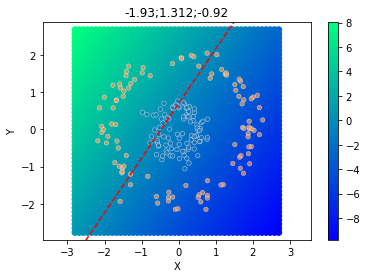

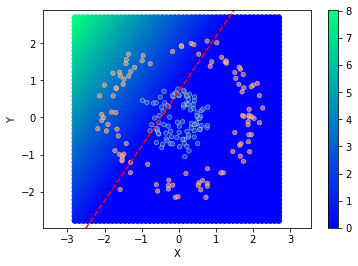

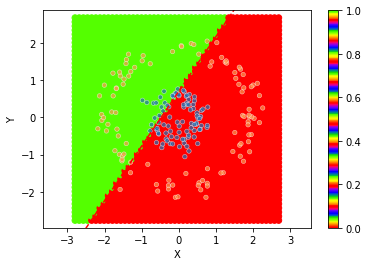

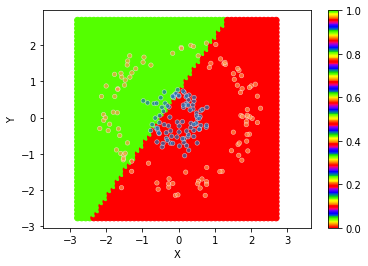

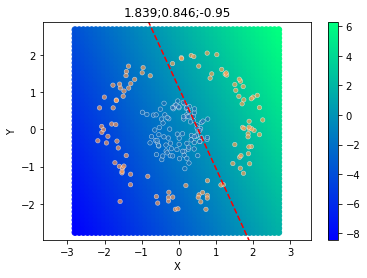

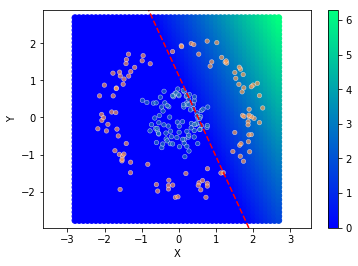

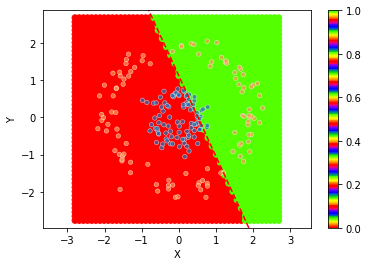

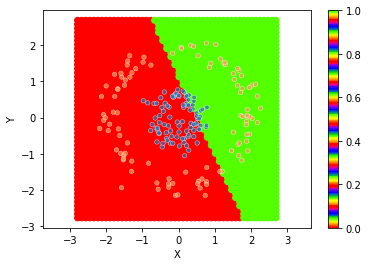

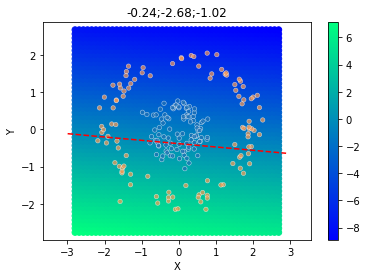

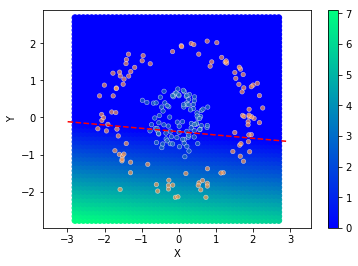

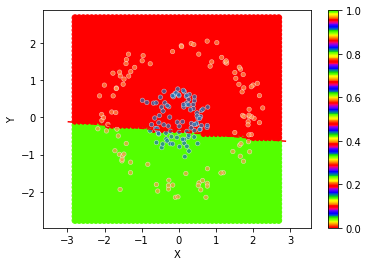

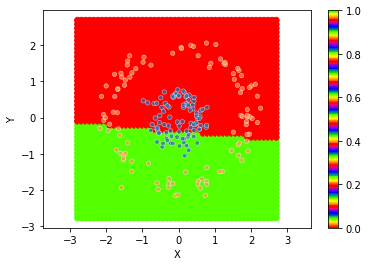

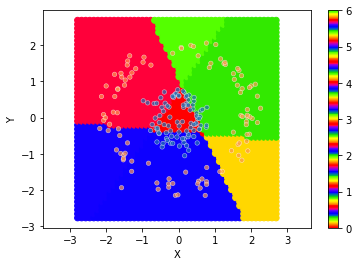

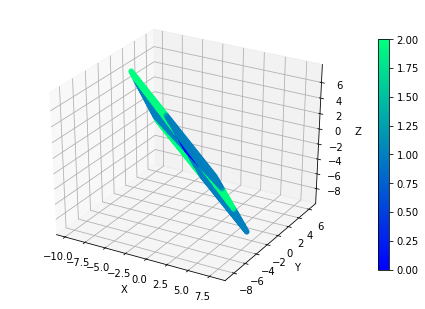

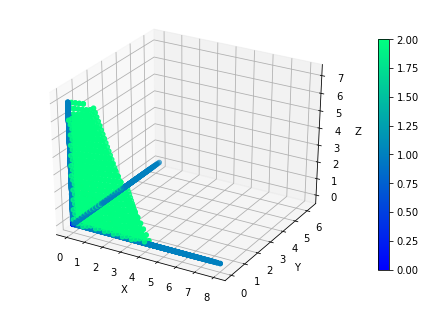

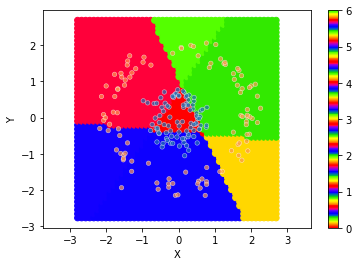

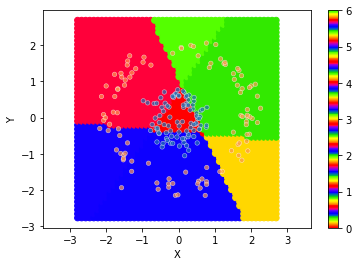

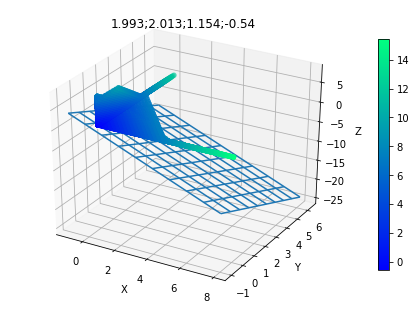

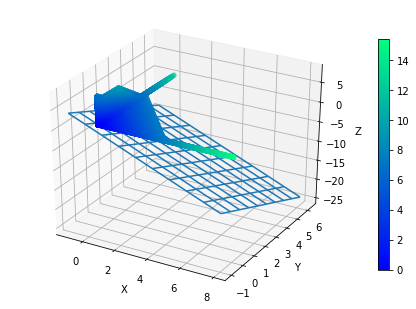

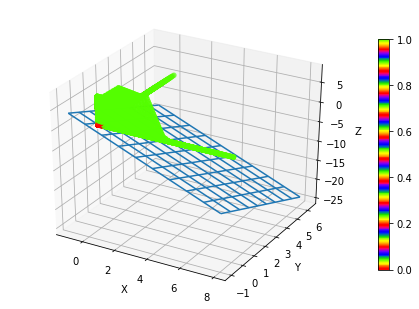

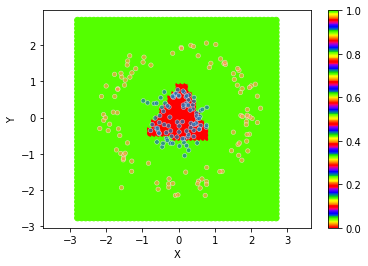

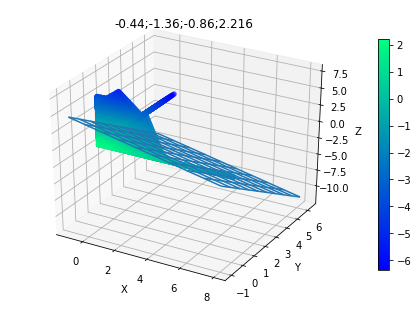

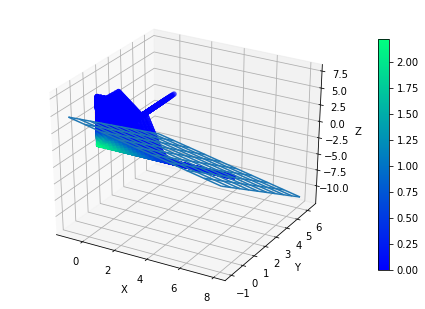

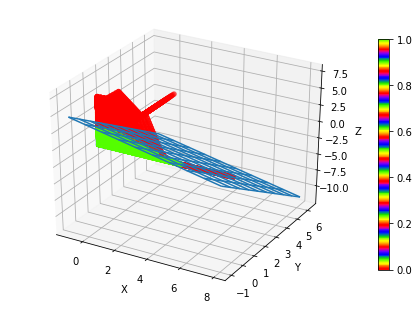

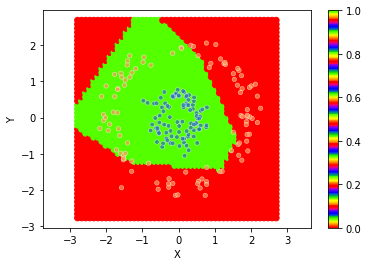

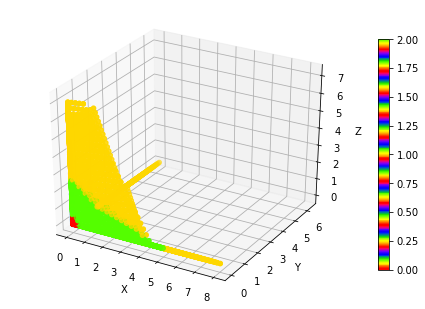

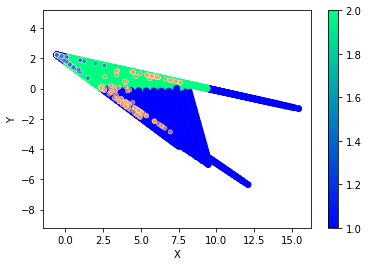

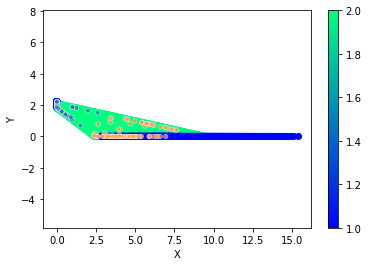

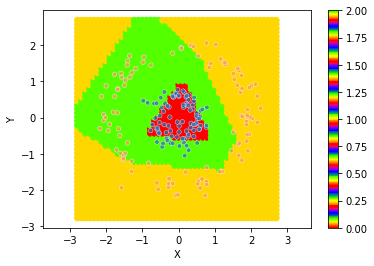

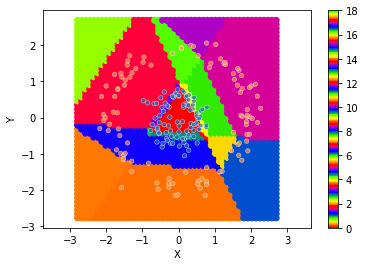

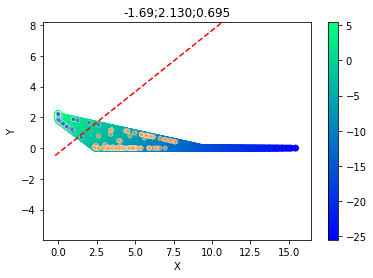

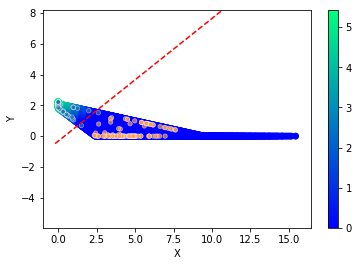

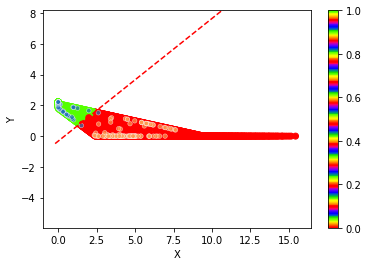

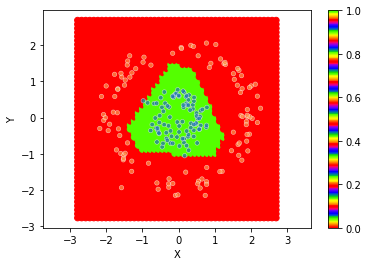

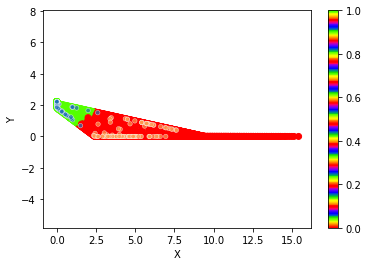

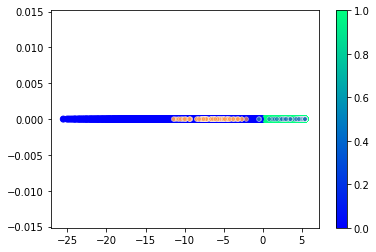

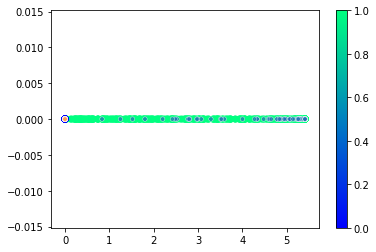

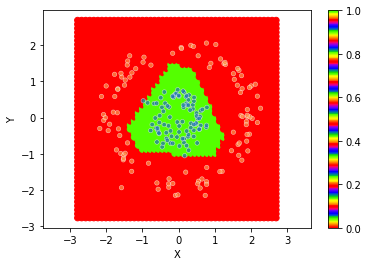

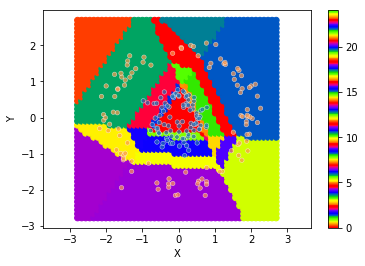

In [7]:
#后层每个节点对输入空间进行激活的值
#后层每个节点对输入空间的划分
#后层对输入空间的总体划分（每个节点划分的叠加？）
#输入空间进行仿射变换后在后层空间中的情况
#输入空间在进行非线性变换后在后层空间中的情况

#后层每个节点对原始特征空间的划分
#后层对原始特征空间的总体划分（叠加？）
#当前原始特征空间胞腔分解情况(叠加？)

### 每个节点对应5个图：在输入空间形成超平面；输入空间进行非线性变换后的值；对输入空间进行划分；在原始特征空间进行划分；该节点与前n-1层的共同作用
### 每一层对应5个图：该层对输入空间的划分；该层对原始特征空间的划分；前n层对原始特征空间的划分；对输入空间进行仿射变换；进行非线性变换
X = X[:200,:]
y = y[:200]
#plt.close('all')
inV,inX = p,X
layersBinCode = None
for w,b in zip(W,B):
    transV = inV @ w + b
    transX = inX @ w + b
    actV = actf(transV)
    actX = actf(transX)
    #第k层各个节点的划分(第k层的二进制编码)
    layerBinCode = np.where(actV > 0,1,0)
    #第k层的数字编码
    layerNumCode = mapping(layerBinCode)
    #第k层的激活神经元的数量
    layerNumCode2 = np.sum(layerBinCode,1)

    #前k层的二进制编码
    layersBinCode = layerBinCode if layersBinCode is None else np.hstack((layersBinCode,layerBinCode))    
    #前k层的数字编码
    layersNumCode = mapping(layersBinCode)
    #前k层激活神经元的数量
    layersNumCode2 = np.sum(layersBinCode,1)

    n = actV.shape[-1]

    l = np.vstack((w,b)).T.astype('<U5').tolist()
    sl = [';'.join(z) for z in l]
    projIn = '3d' if inV.shape[-1] == 3 else None
    projOut = '3d' if transV.shape[-1] == 3 else None
    for i in range(n):
        #在输入空间形成超平面
        ax = scatter(inV,transV.T[i],inX,(w[:,i],b[i]),cmap = 'winter')
        ax.set_title(sl[i])
        #后层每个节点对输入空间进行激活的值        
        ax = scatter(inV,actV.T[i],inX,(w[:,i],b[i]),cmap = 'winter')
        #后层每个节点对输入空间的划分
        ax = scatter(inV,layerBinCode.T[i],inX,(w[:,i],b[i]))
        #在原始特征空间进行划分
        ax = scatter(p,layerBinCode.T[i],X)
        #该节点与前n-1层的共同作用
        #ax = scatter(p,part.T[i],X)
            
    #第k层对输入空间的总体划分（每个节点划分的叠加？）
    scatter(inV,layerNumCode,inX)
    #输入空间进行仿射变换后在后层空间中的情况
    scatter(transV,layerNumCode2,transX,cmap='winter')
    #输入空间在进行非线性变换后在后层空间中的情况
    scatter(actV,layerNumCode2,actX,cmap='winter')
    #第k层对原始特征空间的总体划分（叠加？）
    scatter(p,layerNumCode,X)
    #前k层对原始特征空间胞腔分解情况(叠加？)
    scatter(p,layersNumCode,X)
    
    inX = actX
    inV = actV
    plt.show();
...;